<a href="https://colab.research.google.com/github/hhhman1981/skills-introduction-to-github/blob/main/%E8%A9%A6%E5%81%9A%E6%92%88Yahoo%E8%82%A1%E5%88%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>歡迎使用 Colab！</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;新功能&#41; 使用 Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


如果你已經熟悉 Colab，請觀看這部影片瞭解互動式表格、執行過的程式碼歷史記錄檢視畫面，以及指令區塊面板。

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  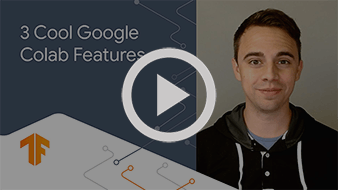
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab 是什麼？</h2>
</div>

Colab &#40;全名為「Colaboratory」&#41; 可讓你在瀏覽器中編寫及執行 Python 程式碼，並具有以下優點：
- 不必進行任何設定
- 免付費使用 GPU
- 輕鬆共用

無論你是<strong>學生</strong>、<strong>數據資料學家</strong>或是 <strong>AI 研究人員</strong>，Colab 都能讓你的工作事半功倍。請觀看 <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 的簡介影片</a>瞭解詳情，或是直接瀏覽以下的新手入門說明！

<div class="markdown-google-sans">

## <strong>開始使用</strong>
</div>

你正在閱讀的文件並非靜態網頁，而是名為 <strong>Colab 筆記本</strong>的互動式環境，可讓你撰寫和執行程式碼。

舉例來說，以下是包含簡短 Python 指令碼的<strong>程式碼儲存格</strong>，可進行運算、將值儲存至變數中並列印運算結果：

In [1]:
# prompt: 爬蟲程式從YAHOO股票抓取股利
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

def get_dividend_yahoo(stock_code):
  url = f"https://tw.stock.yahoo.com/quote/{stock_code}/dividend"
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36"}
  try:
    response = requests.get(url) #, headers=headers)
    response.raise_for_status()  # 檢查請求是否成功
    return response
  except requests.exceptions.RequestException as e:
    print(f"抓取股利資訊時發生錯誤：{e}")
    return None

def parse_header(webdata):
  soup = BeautifulSoup(webdata.content, "html.parser")
  dividend_data0 = []
  for aaa in soup.find('div','table-header-wrapper').find_all('div'):
    dividend_data0.append(aaa.text)
  dividend_data_tittle = [str('股號')]
  for x in (dividend_data0[1:]):
    dividend_data_tittle.append(x)
  return (dividend_data_tittle)

def parse_data(webdata):
  soup = BeautifulSoup(webdata.content, "html.parser")
  #先收集一個 Summary (12 cloumn)
  global dividend_summary
  dividend_summary = []
  dividend_summary.append(str(soup.find("div", id="main-0-QuoteHeader-Proxy").find_all("span")[0].text)) #股號
  dividend_summary.append(soup.find_all('h1')[1].text) #中文股名
  dividend_summary.append(soup.find("div", id="main-0-QuoteHeader-Proxy").find_all("span")[2].text) #股價
  dividend_summary.append(soup.find("div", id="main-0-QuoteHeader-Proxy").find_all("span")[7].text) #成交量
  #dividend_summary.append(" 連續 ")
  dividend_summary.append(soup.find('p').find_all('span')[1].text) #連續 n 年
  #dividend_summary.append(" 年的股利合計 ")
  dividend_summary.append(soup.find('p').find_all('span')[2].text) #股利合計 m 元
  #dividend_summary.append(" 元。近 ")
  dividend_summary.append(soup.find('p').find_all('span')[4].text) #近 n 年
  #dividend_summary.append(" 年的平均殖利率 ")
  dividend_summary.append(soup.find('p').find_all('span')[5].text) #平均殖利率

  #收集各次股利表格資訊
  dividend_data = []
  temp_data=[]
  li_count = 0
  for bbb in soup.find('div','table-body-wrapper').find_all('div'):
    li_count = li_count+1
    if li_count >1 :
      if (li_count-1) % 13 > 2 and (li_count-1) % 13 < 13 :
        temp_data.append(bbb.text)
      elif (li_count-1) % 13 == 0 :
        temp_data.append(bbb.text)
      elif (li_count-1) % 13 == 2 :
        dividend_data.append(temp_data)
        temp_data=[stock_code[:-3]]
  return dividend_data[1:]

if __name__ == "__main__":
  stock_list = ["00679B.TW","00687B.TW","00779B.TW","00719B.TW","00795B.TW","2330.TW"]
  cost_dic = {"00679B":{"price":29.66,"pcs":50},"00687B":{"price":30.79,"pcs":50},"00779B":{"price":31.18,"pcs":26},
         "00719B":{"price":32.86,"pcs":5},"00795B":{"price":29.56,"pcs":23},"2330":{"price":835,"pcs":50}}
  iQuery_count = 0
  All_data = []
  All_summary = []
  for stock_code in stock_list:
    webdata = get_dividend_yahoo(stock_code)
    if webdata:
      iQuery_count += 1
      if iQuery_count == 1:
        table_tittle = parse_header(webdata)

        stock_dividend_list = parse_data(webdata)
        for aaa in stock_dividend_list:
          All_data.append(aaa)
        #All_data.append(dividend_summary)
        All_summary.append(dividend_summary)
      else:
        time.sleep(0.5)
        stock_dividend_list = parse_data(webdata)
        for aaa in stock_dividend_list:
          All_data.append(aaa)
        #All_data.append(dividend_summary)
        All_summary.append(dividend_summary)
    else:
      print(f"無法取得 {stock_code} 的股利資訊。")
  #print(All_data)
  df = pd.DataFrame(All_data,columns=table_tittle)
  print(df)

  sum_tittle = ['股號','股名','現價','成交量','連發年數','連發合計(元)','計算平均年數','平均殖利率']
  sum2_tittle = ['股號','成本價','張數']
  #print(All_summary)
  df2 = pd.DataFrame( All_summary , columns = sum_tittle )
  #print(df2)
  temp_list = []
  all_list = []
  for keys in cost_dic.keys():
    temp_list.append(keys)
    temp_list.append(cost_dic[keys]['price'])
    temp_list.append(cost_dic[keys]['pcs'])
    all_list.append(temp_list)
    temp_list = []
  df3 = pd.DataFrame( all_list , columns = sum2_tittle )
  #print(df3)
  df4 = pd.merge(df2, df3, on='股號' )

  df4['AVE殖利率'] = df4['平均殖利率'].str.replace('%',"")
  df4["AVE殖利率"] = pd.to_numeric(df4["AVE殖利率"], errors="coerce" ,downcast = 'float').fillna(0.0)

  df4["現價"] = pd.to_numeric(df4["現價"], errors="coerce" ,downcast = 'float').fillna(0.0)
  df4['盈虧'] = ((df4['現價'] - df4['成本價']) * df4['張數'] * 1000).round(0)
  df4['盈虧%'] = ((df4['盈虧'] / (df4['成本價'] * df4['張數'] * 1000))*100).round(2)

  df4['單股總成本'] = (df4['成本價'] * df4['張數'] * 1000).round(0)
  print(df4)
  print("總計: " , df4['盈虧'].sum().round(0) , ((df4['盈虧'].sum() / df4['單股總成本'].sum())*100).round(2) , "%")



         股號  發放期間    所屬期間  現金股利  股票股利  現金殖利率 除息日昨收價         除息日         除權日  \
0    00679B  2025          0.62     -  2.36%                                  
1    00679B        2025Q1  0.32     -  1.22%  26.31  2025/05/22           -   
2    00679B        2024Q4  0.30     -  1.04%  28.74  2025/02/21           -   
3    00679B  2024          1.33     -  4.57%                                  
4    00679B        2024Q3  0.34     -  1.17%  29.12  2024/11/18           -   
..      ...   ...     ...   ...   ...    ...    ...         ...         ...   
224    2330  1997    1996     -  5.00      -      -           -  1997/06/12   
225    2330  1996    1995     -  8.00      -      -           -  1996/05/04   
226    2330  1995    1994     -  8.00      -      -           -  1995/06/15   
227    2330  1994    1993  1.00  2.48      -      -  1994/06/23  1994/06/23   
228    2330  1993    1992     -  1.04      -      -           -  1993/07/27   

        現金股利發放日     股票股利發放日 填息天數  
0               

如要執行上方儲存格中的程式碼，請按一下進行選取，再按一下程式碼左側的播放鍵，或是使用鍵盤快速鍵「Command/Ctrl + Enter 鍵」。按一下儲存格即可開始編輯程式碼。

在一個儲存格中定義的變數之後可用於其他儲存格：

In [2]:
df5 = df
#df5['現金殖利率'] = df5['現金殖利率'].str.replace('%',"")
#df5['現金殖利率'] = pd.to_numeric(df5["現金殖利率"], errors="coerce" ,downcast = 'float').fillna(0.0)
print(type(df5['現金殖利率'][5]))
#print(df5['現金殖利率'])
print(df5.groupby('發放期間'))
print(df5.groupby(by=['股號','所屬期間']).sum())






<class 'str'>
                                               發放期間  \
股號     所屬期間                                           
00679B         202520242023202220212020201920182017   
       2017Q3                                         
       2017Q4                                         
       2018Q1                                         
       2018Q2                                         
...                                             ...   
2330   2023Q4                                         
       2024Q1                                         
       2024Q2                                         
       2024Q3                                         
       2024Q4                                         

                                                現金股利       股票股利  \
股號     所屬期間                                                       
00679B         0.621.331.171.120.870.761.050.9750.74  ---------   
       2017Q3                                   0.28          -   
  

In [3]:
la = '1.23%'
la.replace( '%','GG' )
print(la.replace( '%','GG' ))

1.23GG


Colab 筆記本可讓你在單一文件中結合<strong>可執行的程式碼</strong>和 <strong>RTF 格式</strong>，並附帶<strong>圖片</strong>、<strong>HTML</strong>、<strong>LaTeX</strong> 等其他格式的內容。你建立的 Colab 筆記本會儲存到你的 Google 雲端硬碟帳戶中。你可以輕鬆將 Colab 筆記本與同事或朋友共用，讓他們在筆記本上加上註解，或甚至進行編輯。詳情請參閱 <a href="/notebooks/basic_features_overview.ipynb">Colab 總覽</a>。如要建立新的 Colab 筆記本，你可以使用上方的「檔案」選單或以下連結：<a href="http://colab.research.google.com#create=true">建立新的 Colab 筆記本</a>。

Colab 筆記本是由 Colab 代管的 Jupyter 筆記本。如要進一步瞭解 Jupyter 專案，請參閱 <a href="https://www.jupyter.org">jupyter.org</a>。

<div class="markdown-google-sans">

## 數據資料學
</div>

Colab 可讓你充分利用熱門 Python 程式庫的強大功能，對資料進行分析並以視覺化方式呈現。下方的程式碼儲存格使用 <strong>numpy</strong> 來產生一些隨機性資料，並透過 <strong>matplotlib</strong> 將這些資料視覺化。按一下儲存格即可開始編輯程式碼。

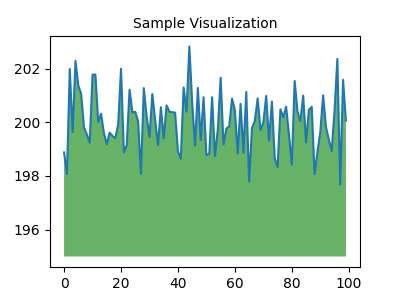

In [4]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

你可從自己的 Google 雲端硬碟帳戶 &#40;包括試算表&#41;、GitHub 和許多其他來源，將資料匯入 Colab 筆記本中。如要進一步瞭解如何匯入資料以及將 Colab 用於數據資料學，請參閱下方「<a href="#working-with-data">處理資料</a>」底下的連結。

<div class="markdown-google-sans">

## 機器學習
</div>

你只需要寫<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">幾行程式碼</a>，即可透過 Colab 匯入圖片資料集、根據圖片資料集訓練圖片分類工具並評估模型。Colab 筆記本可在 Google 的雲端伺服器上執行程式碼，也就是說，您可以充分運用 Google 硬體的強大效能 &#40;包括 <a href="#using-accelerated-hardware">GPU 和 TPU</a>&#41;，而不必在意自己的電腦性能如何，因為你只要使用瀏覽器就可以了。

Colab 廣泛運用於機器學習社群，相關應用包括：
- 開始使用 TensorFlow
- 開發及訓練類神經網路
- 使用 TPU 進行實驗
- 推廣 AI 研究
- 建立教學課程

如要查看示範機器學習應用程式的範例 Colab 筆記本，請參閱下方的<a href="#machine-learning-examples">機器學習範例</a>。

In [5]:
import json
import matplotlib
import matplotlib.pyplot as plt
#安裝中文字型
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta' , size = 12 )

params = { 'offset' : 0 , 'limit':"" }
response = requests.get( 'https://datacenter.taichung.gov.tw/swagger/OpenData/5b7ec422-8d7b-4f35-bce1-040f7bf389d8', params=params)

ResponseList_json = json.loads(response.text)
SumLList = []
TempList = []
TitleList = []
iDataRows = 0
for rows in ResponseList_json:
  iDataRows += 1
  if iDataRows == 1 :
    for key in rows.keys():
      TitleList.append(key)

  for key in rows.keys():
    TempList.append(rows[key])
  SumLList.append(TempList)
  TempList = []

df9 = pd.DataFrame( SumLList , columns = TitleList )

print(df9)


--2025-05-07 03:01:27--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.195.138, 74.125.195.100, 74.125.195.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-07 03:01:27--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-05-07 03:0

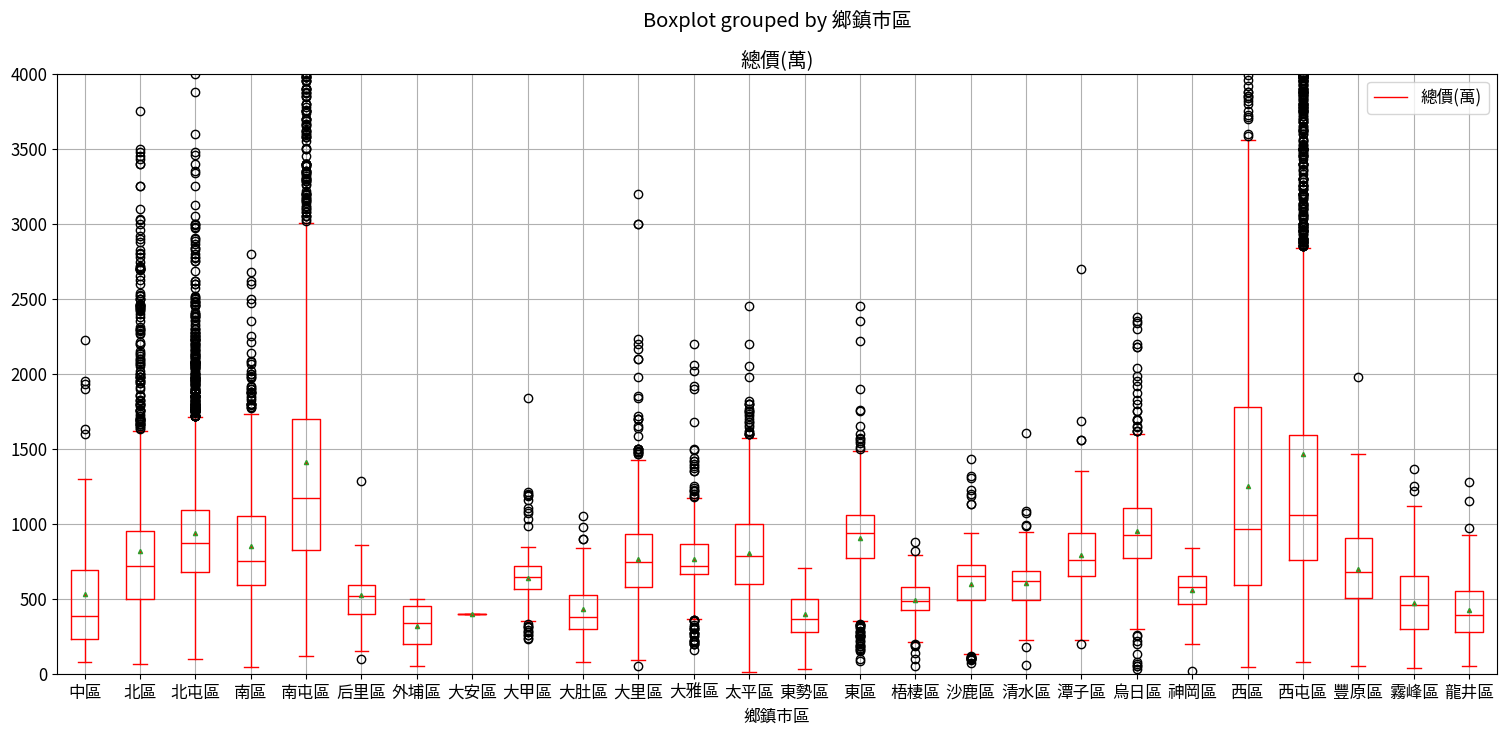

鄉鎮市區
中區      115
北區     1986
北屯區    6144
南區     1379
南屯區    2221
后里區      99
外埔區      12
大安區       1
大甲區     296
大肚區      81
大里區    1637
大雅區     579
太平區    1851
東勢區      37
東區      961
梧棲區     227
沙鹿區     310
清水區     577
潭子區     824
烏日區    1659
神岡區      52
西區     1374
西屯區    3934
豐原區     633
霧峰區     124
龍井區     353
dtype: int64


In [7]:
#1平方公尺= 0.3025坪; 1坪= 3.30579 平方公尺


dfTemp = df9
dfTemp["單價-每平方公尺"] = pd.to_numeric(df9["單價-每平方公尺"], errors="coerce" ,downcast = 'float').fillna(0.0)
dfTemp["土地移轉總面積-平方公尺"] = pd.to_numeric(df9["土地移轉總面積-平方公尺"], errors="coerce" ,downcast = 'float').fillna(0.0)
dfTemp["總價-元"] = pd.to_numeric(df9["總價-元"], errors="coerce" ,downcast = 'integer').fillna(0)
dfTemp["單價坪(萬)"] = (df9["單價-每平方公尺"] / 0.3025 / 10000).round(2)
dfTemp["總坪數"] = (df9["土地移轉總面積-平方公尺"] / 0.3025).round(2)
dfTemp["總價(萬)"] = (dfTemp["總價-元"] / 10000).round(2)
dfTemp["民國年月"] = pd.to_numeric(df9["民國年月"], errors="coerce" ,downcast = 'integer').fillna(0)

dfTemp2 = dfTemp.loc[(dfTemp['總坪數'] > 20) &
           (dfTemp['總坪數'] < 150) &
           #(dfTemp['鄉鎮市區']=="北屯區")
           (dfTemp['交易標的'].str.count('房地') > 0)
           ]

dfTemp3 = dfTemp2.loc[:,["總價(萬)",'鄉鎮市區']]
#print(type(dfTemp2.loc[:,["總價(萬)",'鄉鎮市區']]))
# 繪製箱形圖
dfTemp3.boxplot(
    column="總價(萬)",
    by="鄉鎮市區",
    figsize=(18, 8),
    color="#ff0000",
    showmeans=True,
    meanprops={"markerfacecolor": "red", "markersize": 3}
)
# 添加圖例
plt.legend(["總價(萬)"], loc="upper right")
plt.subplot
plt.ylim(0, 4000)
#plt.ylim((0,2000))
# 顯示圖表
plt.show()


aaa = dfTemp2.groupby('鄉鎮市區').mean("總價(萬)")
bbb = dfTemp2.groupby('鄉鎮市區').size()

print(bbb)



<div class="markdown-google-sans">

## 其他資源

### 在 Colab 中使用筆記本

</div>

- [Colaboratory 總覽](/notebooks/basic_features_overview.ipynb)
- [Markdown 指南](/notebooks/markdown_guide.ipynb)
- [匯入程式庫及安裝依附元件](/notebooks/snippets/importing_libraries.ipynb)
- [儲存和載入 GitHub 中的筆記本](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [互動式表單](/notebooks/forms.ipynb)
- [互動式小工具](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 處理資料
</div>

- [載入資料：雲端硬碟、試算表及 Google Cloud Storage](/notebooks/io.ipynb)
- [圖表：將資料視覺化](/notebooks/charts.ipynb)
- [開始使用 BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 機器學習密集課程

<div>

以下是一些 Google 線上機器學習課程的筆記本。詳情請參閱<a href="https://developers.google.com/machine-learning/crash-course/">完整的課程網站</a>。
- [Pandas DataFrame 簡介](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [以 tf.keras 使用合成資料進行線性迴歸](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 使用加速硬體
</div>

- [搭配 GPU 使用 TensorFlow](/notebooks/gpu.ipynb)
- [使用 TPU 的 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 主要範例

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>：使用 Nvidia 的 NeMo 對話式 AI 工具組將音訊片段中的語音換成電腦產生的語音。

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">重新訓練圖片分類工具</a>：以預先訓練的圖片分類工具為基礎，建立一個分辨花朵的 Keras 模型。
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">文字分類</a>：將 IMDB 電影評論分類為<em>正面</em>或<em>負面</em>。
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">風格轉換</a>：運用深度學習轉換圖片的風格。
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">支援多種語言的 Universal Sentence Encoder 問與答</a>：使用機器學習模型來回答 SQuAD 資料集的問題。
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">影片畫面內插</a>：預測影片在第一個與最後一個畫面之間的內容。
